  #                          Segmentation des clients  E-Commerce Olist

# Sommaire

1. Chargement et description

2. Feature engineering.

3. Exploration uni et multi-dimentielle.

In [61]:
# Librairies import
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, cos, sin, asin, sqrt

# Chargement et description

## Chargement des datasets


### Les clients

In [62]:
# root path for all dataset
root_path = "C:/Users/maido/Desktop/CentralSuplec/P05_segmentation/"

# olist_customers_dataset
clients = pd.read_csv(root_path + "olist_customers_dataset.csv")
clients.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



* customer_id : Clé client- commandes
* customer_unique_id : Identifiant unique du client


In [63]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


### Les données de géolocalisation

In [64]:
# olist_geolocation_dataset
location = pd.read_csv(root_path + "olist_geolocation_dataset.csv")
location.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Les commandes clients

In [65]:
# olist_orders_dataset
commandes = pd.read_csv(root_path + "olist_orders_dataset.csv")
commandes.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [66]:
commandes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


### Les articles

In [67]:
# olist_order_items_dataset
order_items = pd.read_csv(root_path + "olist_order_items_dataset.csv")
order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [68]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


### Les reglements

In [69]:
# olist_order_payments_dataset
order_payments = pd.read_csv(root_path + "olist_order_payments_dataset.csv")
order_payments.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


* payment_sequential :  méthodes de paiement appliquées.
* payment_installments : Nombre de versements 

In [70]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


### Avis clients

In [71]:
# olist_order_reviews_dataset
reviews = pd.read_csv(root_path + "olist_order_reviews_dataset.csv")
reviews.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [72]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


### Les produits

In [73]:
# olist_products_dataset
produits = pd.read_csv(root_path + "olist_products_dataset.csv")
produits.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [74]:
produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


### Les vendeurs

In [75]:
# olist_sellers_dataset
vendeurs =   pd.read_csv(root_path + "olist_sellers_dataset.csv")
vendeurs.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [76]:
vendeurs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


### Categories

In [77]:
# olist_product_category_name_translation_dataset
categories = pd.read_csv(root_path + "product_category_name_translation.csv")
categories.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [78]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


#  datasets mergés

In [79]:
produits_ = pd.merge(produits, categories,
                    how="left",on="product_category_name")

produits_.drop(["product_category_name", "product_weight_g",
                     "product_length_cm", "product_height_cm",
                     "product_width_cm","product_photos_qty","product_description_lenght","product_name_lenght"], axis=1, inplace=True)
produits_ = produits_.rename(columns={"product_category_name_english":
                                    "product_category_name"})
produits_.head(6)

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares
5,41d3672d4792049fa1779bb35283ed13,musical_instruments


Text(0.5, 1.0, 'Les catégories produits les plus représentées\n')

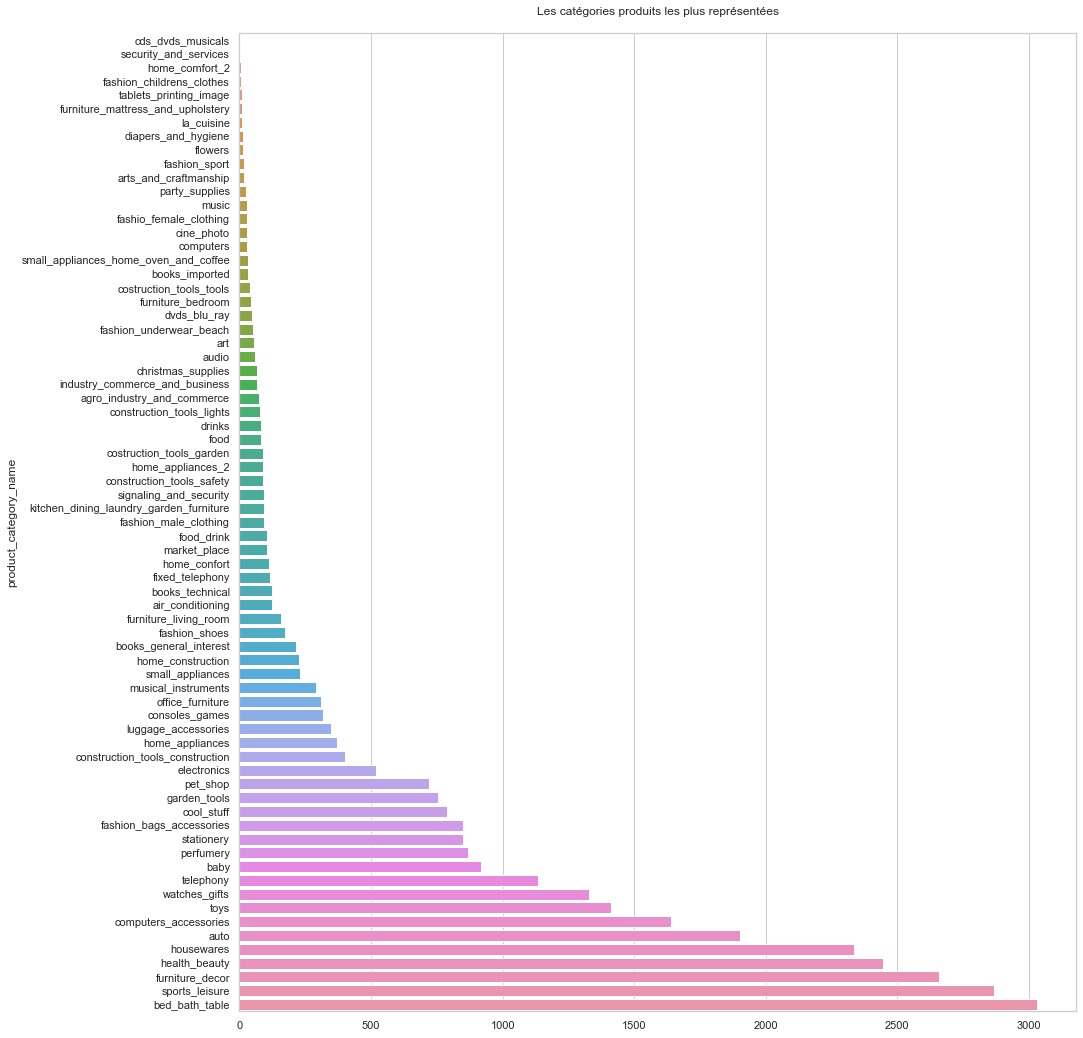

In [80]:
df=produits_.groupby("product_category_name").count()['product_id'].sort_values() # le nb de produit par cat
sns.set(style="whitegrid")
plt.figure(figsize= (15,18) )
ax= sns.barplot(y= df.index , x= df.values )
plt.title("Les catégories produits les plus représentées\n")

### Commandes et clients

In [81]:
order_items_ = pd.merge(order_items, commandes,
                       how="left",
                       on="order_id")
order_items_.drop(["seller_id", "shipping_limit_date",
                     "order_approved_at",
                     "order_delivered_carrier_date",
                     "order_estimated_delivery_date"],
                 axis=1,
                 inplace=True)
order_items_.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31


In [82]:
order_items_.groupby(by="order_status").sum()["order_item_id"]

order_status
approved            4
canceled          704
delivered      132036
invoiced          435
processing        455
shipped          1294
unavailable         8
Name: order_item_id, dtype: int64

Nous conserverons les articles  "delivered".

In [83]:
order_items_ = order_items_[order_items_["order_status"] == "delivered"]

Nous pouvons également vérifier l'évolution du nombre de commandes passées par jour sur le site E-Commerce :

In [84]:
# Modify object cols in timestamp format
datetime_cols = ["order_purchase_timestamp", "order_delivered_customer_date"]
for col in datetime_cols:
    order_items_[col] = order_items_[col].astype('datetime64[ns]')
order_items_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_item_id                  110197 non-null  int64         
 2   product_id                     110197 non-null  object        
 3   price                          110197 non-null  float64       
 4   freight_value                  110197 non-null  float64       
 5   customer_id                    110197 non-null  object        
 6   order_status                   110197 non-null  object        
 7   order_purchase_timestamp       110197 non-null  datetime64[ns]
 8   order_delivered_customer_date  110189 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 8.4+ MB


nombre de commandes par mois, jour de la semaine ou heure de la journée :

([<matplotlib.axis.XTick at 0x2168098b4f0>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sept'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

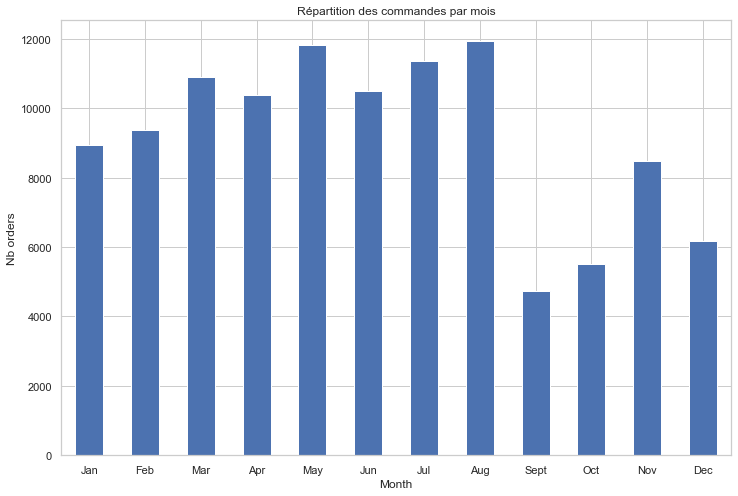

In [85]:
order_month=order_items_.groupby( order_items_['order_purchase_timestamp'].dt.month).count()['order_id']
fig= plt.figure(figsize=(12,8))
order_month.plot(kind='bar', title="Répartition des commandes par mois",
          ylabel="Nb orders",
          xlabel="Month",
          legend=False)
plt.xticks(np.arange(0,12), ['Jan','Feb','Mar','Apr','May','Jun',
                             'Jul','Aug','Sept','Oct','Nov','Dec'], rotation='horizontal')

Les commandes sont passées le plus au mois Aout et Mai.

Crèons à partir de la table des payements Le nombre d'échéances.

In [86]:
nv_payments = order_payments.groupby(by="order_id").agg(
    {"payment_installments": 'sum'})

order_item_payement = pd.merge(order_items_, nv_payments,
                       how="left",
                       on="order_id")

order_item_payement = order_item_payement.rename(columns={ "payment_installments": "sum_payment_installments"})
order_item_payement = pd.merge(order_item_payement, order_payments[["order_id","payment_type"]],
                       how="left",
                       on="order_id")

order_item_payement.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sum_payment_installments,payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2.0,credit_card
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,3.0,credit_card
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,5.0,credit_card
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2.0,credit_card
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,3.0,credit_card


In [87]:
nv_reviews = reviews.groupby("order_id").agg({
    "review_score": "mean"})

order_item_payement_ = pd.merge(order_item_payement, nv_reviews,
                       how="left",
                       on="order_id")

order_item_payement_.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sum_payment_installments,payment_type,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2.0,credit_card,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,3.0,credit_card,4.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,5.0,credit_card,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2.0,credit_card,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,3.0,credit_card,5.0


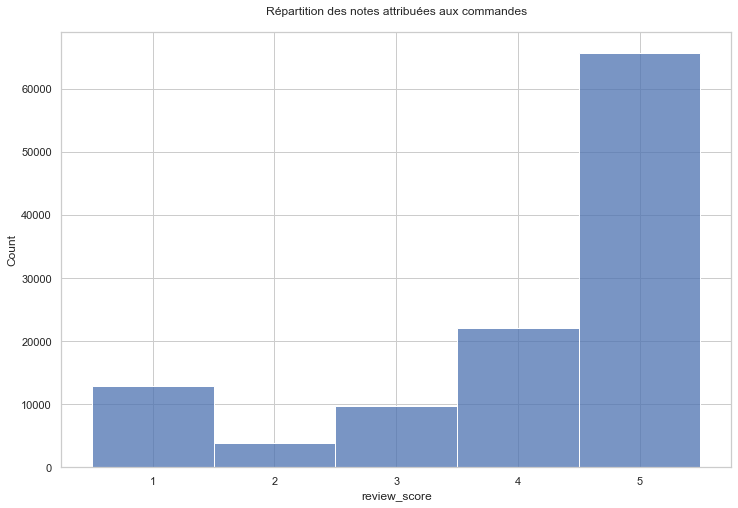

In [88]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(data=order_item_payement_, x="review_score",  # sns.histplot
             discrete=True)
plt.title("Répartition des notes attribuées aux commandes\n")
plt.show()

In [89]:
order_items_pay_cust = pd.merge(order_item_payement_, clients, how="left", on="customer_id")
order_items_pay_cust.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sum_payment_installments,payment_type,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2.0,credit_card,5.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,3.0,credit_card,4.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,5.0,credit_card,5.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2.0,credit_card,4.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,3.0,credit_card,5.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [90]:
data = pd.merge(order_items_pay_cust, produits_,
               how="left",
               on="product_id")
data.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sum_payment_installments,payment_type,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2.0,credit_card,5.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,3.0,credit_card,4.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,5.0,credit_card,5.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2.0,credit_card,4.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,3.0,credit_card,5.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,garden_tools


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115038 entries, 0 to 115037
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115038 non-null  object        
 1   order_item_id                  115038 non-null  int64         
 2   product_id                     115038 non-null  object        
 3   price                          115038 non-null  float64       
 4   freight_value                  115038 non-null  float64       
 5   customer_id                    115038 non-null  object        
 6   order_status                   115038 non-null  object        
 7   order_purchase_timestamp       115038 non-null  datetime64[ns]
 8   order_delivered_customer_date  115030 non-null  datetime64[ns]
 9   sum_payment_installments       115035 non-null  float64       
 10  payment_type                   115035 non-null  object        
 11  

# Feature engineering orienté Client

délai le livraison de chaque commande :

In [92]:
data["delai_livraison"] = (data.order_delivered_customer_date
                               - data.order_purchase_timestamp).dt.round('1d').dt.days
data.drop("order_delivered_customer_date", axis=1, inplace=True)

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


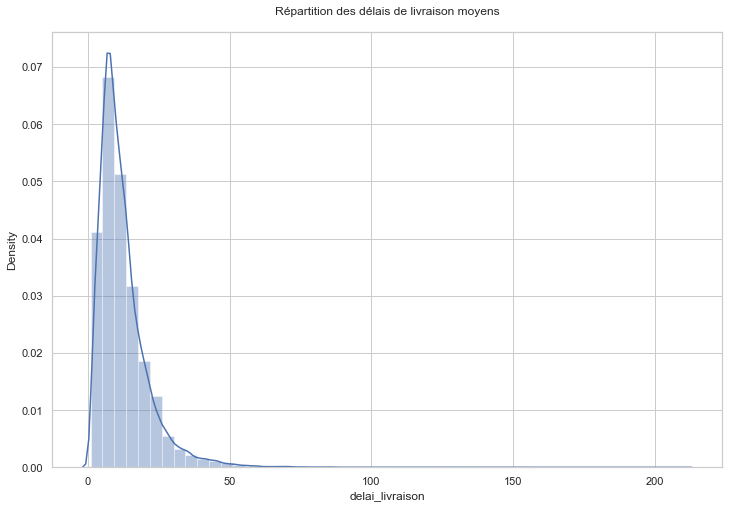

In [93]:
fig = plt.figure(figsize=(12, 8))
sns.distplot( data["delai_livraison"] )
plt.title("Répartition des délais de livraison moyens\n",
          )
plt.show()

In [94]:
data.groupby("product_category_name").nunique()["order_id"]

product_category_name
agro_industry_and_commerce     177
air_conditioning               246
art                            195
arts_and_craftmanship           23
audio                          348
                              ... 
stationery                    2264
tablets_printing_image          79
telephony                     4093
toys                          3804
watches_gifts                 5495
Name: order_id, Length: 71, dtype: int64

nombre de commandes moyen par client :

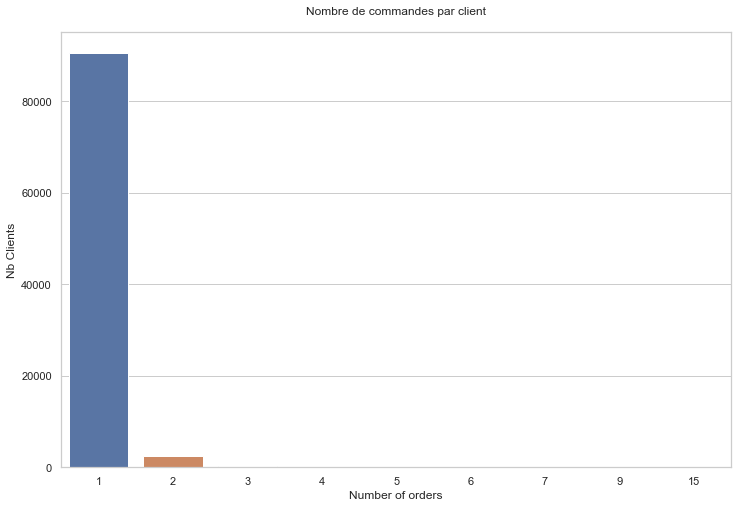

In [95]:
order_per_customer= data.groupby("customer_unique_id").nunique()["order_id"]
# ou data.groupby("customer_unique_id").agg({"order_id": "nunique"})["order_id"].unique() 
# compter hors les doublons sur les orders pour un seul client ( plusieurs articles dans le meme order)
fig = plt.figure(figsize=(12, 8))
sns.barplot(x=order_per_customer.unique() , y= order_per_customer.value_counts()) 
plt.xlabel("Number of orders")
plt.ylabel("Nb Clients")
plt.title("Nombre de commandes par client\n")
plt.show()

 La plupart des clients passe une seule commande donc clients  occasionnels. 

le nombre de jours écoulés entre la première et la dernière commande.

In [96]:
recency = data.groupby("customer_unique_id")\
                .agg({"order_purchase_timestamp": ["max"]})
recency.columns = recency.columns.droplevel(0)

# Max date in dataset
max_date = data["order_purchase_timestamp"].max()
# Delay from the last order
recency["recency"] = [ (max_date - y[0]).round('1d').days for x,y in recurencies.iterrows()]
recency.drop( "max", axis=1, inplace=True)
recency.head(5)

,recency
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,111
0000b849f77a49e4a4ce2b2a4ca5be3f,114
0000f46a3911fa3c0805444483337064,537
0000f6ccb0745a6a4b88665a16c9f078,321
0004aac84e0df4da2b147fca70cf8255,288


# Création du dataset clients 

In [97]:
# Group by customers with sum or mean
data_ = data.groupby("customer_unique_id")\
            .agg({"order_id": "nunique",
                  "price": "sum",
                  "freight_value": "sum",
                  "sum_payment_installments": "mean", 
                  "review_score": "mean",
                  "delai_livraison": "mean",
                  })
# Rename columns
data_ = data_.rename(columns={"order_id": "nb_orders",
                            "price": "total_pay",
                            "freight_value": "total_pay_livraison",
                            "sum_payment_installments": "mean_payment_installments",
                            "review_score": "mean_review_score",
                            "delai_livraison": "mean_delai_livraison",
                            })

data= pd.merge(data_, data[["customer_unique_id","payment_type","customer_state","product_category_name","order_purchase_timestamp"]], left_on= data_.index ,right_on ="customer_unique_id")
# ici matcher avec ces features après le regroupement par customer_id_unique est à titre indicatif.
data = pd.merge(data, recency ,how="left",on="customer_unique_id")
data.head(6)

,nb_orders,total_pay,total_pay_livraison,mean_payment_installments,mean_review_score,mean_delai_livraison,customer_unique_id,payment_type,customer_state,product_category_name,order_purchase_timestamp,recency
0,1,129.90,12.00,8.0,5.0,6.0,0000366f3b9a7992bf8c76cfdf3221e2,credit_card,SP,bed_bath_table,2018-05-10 10:56:27,111
1,1,18.90,8.29,1.0,4.0,3.0,0000b849f77a49e4a4ce2b2a4ca5be3f,credit_card,SP,health_beauty,2018-05-07 11:11:27,114
2,1,69.00,17.22,8.0,3.0,26.0,0000f46a3911fa3c0805444483337064,credit_card,SC,stationery,2017-03-10 21:05:03,537
3,1,25.99,17.63,4.0,4.0,20.0,0000f6ccb0745a6a4b88665a16c9f078,credit_card,PA,telephony,2017-10-12 20:29:41,321
4,1,180.00,16.89,6.0,5.0,13.0,0004aac84e0df4da2b147fca70cf8255,credit_card,SP,telephony,2017-11-14 19:45:42,288
5,1,154.00,12.98,8.0,4.0,2.0,0004bd2a26a76fe21f786e4fbd80607f,credit_card,SP,garden_tools,2018-04-05 19:33:16,146


normalisé les delai de livraison et periode d ordre

In [99]:
data["delai_livraison"] = data["mean_delai_livraison"] / data["nb_orders"]


In [100]:
data.drop(["mean_delai_livraison"], inplace=True , axis=1 )

# Exploration du dataset client

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115038 entries, 0 to 115037
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   nb_orders                  115038 non-null  int64         
 1   total_pay                  115038 non-null  float64       
 2   total_pay_livraison        115038 non-null  float64       
 3   mean_payment_installments  115035 non-null  float64       
 4   mean_review_score          114226 non-null  float64       
 5   customer_unique_id         115038 non-null  object        
 6   payment_type               115035 non-null  object        
 7   customer_state             115038 non-null  object        
 8   product_category_name      113387 non-null  object        
 9   order_purchase_timestamp   115038 non-null  datetime64[ns]
 10  recency                    115038 non-null  int64         
 11  delai_livraison            115030 non-null  float64 

In [103]:
# Find features to fill and fillna with mode
features_to_fill = data.isnull().sum()
features_to_fill = list(features_to_fill[features_to_fill.values > 0].index)

for f in features_to_fill:
    data[f] = data[f].fillna(data[f].mode()[0])
    print(f, data[f].mode()[0])

mean_payment_installments 1.0
mean_review_score 5.0
payment_type credit_card
product_category_name bed_bath_table
delai_livraison 7.0


In [104]:
data.describe()

,nb_orders,total_pay,total_pay_livraison,mean_payment_installments,mean_review_score,recency,delai_livraison
count,115038.000000,115038.000000,115038.000000,115038.000000,115038.000000,115038.000000,115038.000000
mean,1.082381,191.595610,35.087491,3.165867,4.087629,237.828248,12.021792
std,0.384604,407.114015,65.879026,2.943612,1.332735,152.538695,9.409670
min,1.000000,0.850000,0.000000,0.000000,1.000000,0.000000,0.280000
25%,1.000000,51.960000,15.100000,1.000000,4.000000,114.000000,6.000000
50%,1.000000,99.990000,19.380000,2.000000,5.000000,219.000000,10.000000
75%,1.000000,189.900000,35.370000,4.000000,5.000000,346.000000,15.000000
max,15.000000,13440.000000,1794.960000,26.000000,5.000000,713.000000,210.000000


In [105]:
data.shape

(115038, 12)

In [110]:
data.duplicated().sum()


0

In [106]:
data= data.drop_duplicates()
data.shape

(99294, 12)

## Les différents états du fichier client :

Ici, nous allons regader d'où viennent les clients et si cette localisation a un impact sur les ventes.

In [107]:
data["customer_state"].unique()

array(['SP', 'SC', 'PA', 'PR', 'RJ', 'MA', 'ES', 'RS', 'MG', 'GO', 'DF',
       'BA', 'MT', 'SE', 'TO', 'PE', 'CE', 'AL', 'AC', 'PI', 'PB', 'RN',
       'AM', 'MS', 'AP', 'RO', 'RR'], dtype=object)

<AxesSubplot:title={'center':'stats les plus représentées\n'}, ylabel='customer_state'>

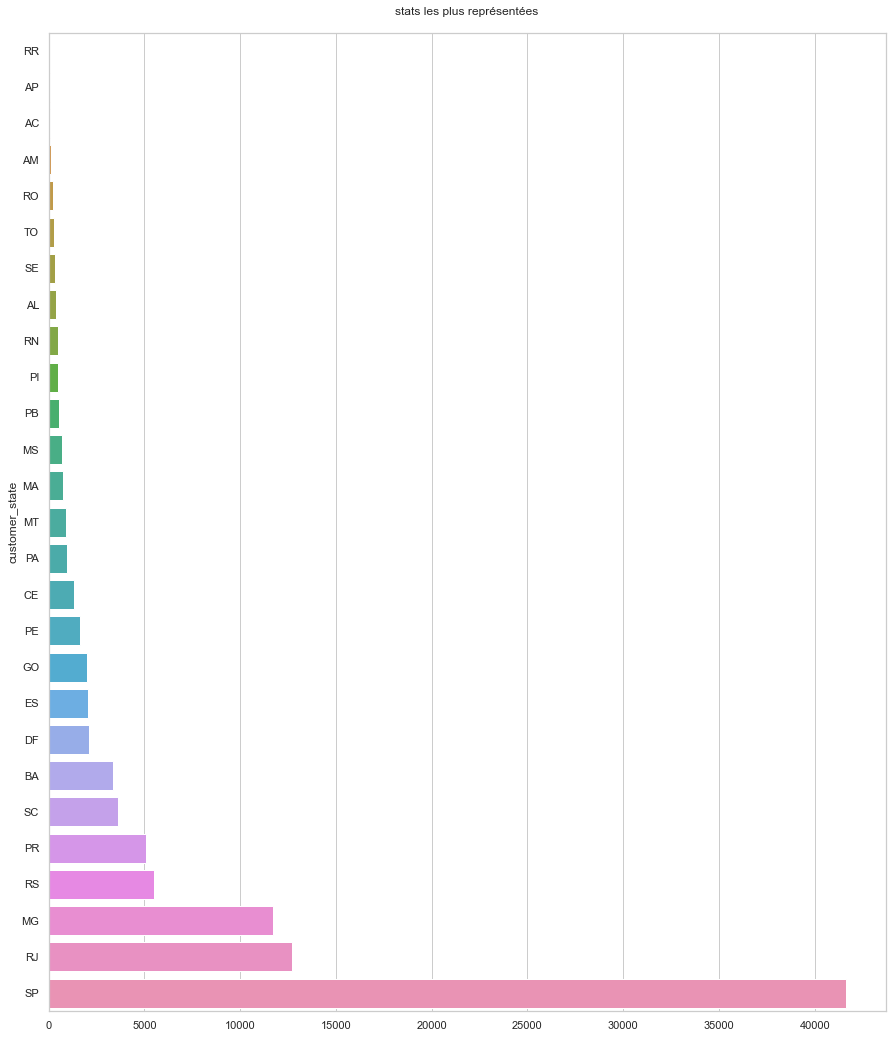

In [108]:
stats=data.groupby("customer_state").count()["customer_unique_id"].sort_values()
# alors
plt.figure(figsize= (15,18) )
ax= sns.set(style="whitegrid")
plt.title("stats les plus représentées\n")
sns.barplot(x=stats.values, y=stats.index)

# Corrélations :

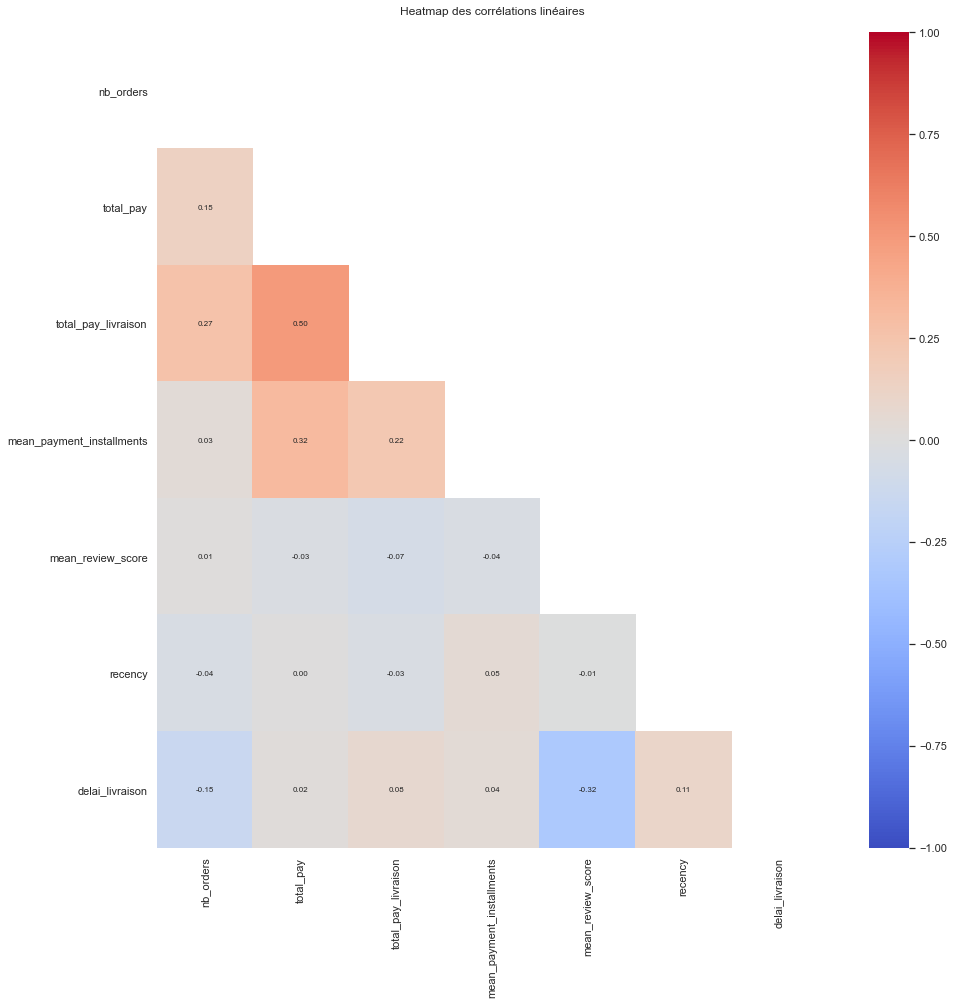

In [109]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True,
                 vmin=-1, vmax=1,
                 fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, 
                 center=0, 
                 cmap="coolwarm")
plt.title("Heatmap des corrélations linéaires\n", 
          )
plt.show()

* Le total payé pour livraison par clients est corrélé avec le total payé et total livraison et les echeance.

* On remarque que le score de review est inversement corrélé au délai de livraison. 

* Le nombre de moyens de payement est positivement corrélé au montant totale payé sur la plateforme. 

* le nombre d echeance est positivement corrélé avec total payé et total livraison 

* nombre de commande est negativement corrélé à la période entre les commandes passées (donc positivement corrélé à la frequence des commandes passées). 


### Export du dataset final pour classification non-supervisée

In [111]:
data.to_csv("olist-customers-segmentation.csv")